# Exoploring the effect that focus changes have on the detection of planets

#### We take the code for generating the TESS Input Catalog and recalculate contamination with different PSF widths. 

Here is what we do
* make a small version of the TIC centered on coordinates ra,dec (50,-30). Why these coordaintes? because they weem to be fairly representative of the sky.
* We cut out a 12 degree radius circle, this kinda approximatates 1 TESS camera
* we calculate the contamination on the top 4000 priority targets in this field of view
* we use a PSF width of 1.88 as a base and multiply that by factors of [1.0, 1.1, 1.2, 1.3, 1.5, 2.0, 3.0, 5.0] 

We're going to open a datafile that I made earlier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
contamfile = 'contamfile.h5'
df = pd.read_hdf(contamfile)


In [3]:
df.columns

Index(['w1.0', 'w1.1', 'w1.2', 'w1.3', 'w1.5', 'w2.0', 'w3.0', 'w5.0',
       'TESSMAG', 'RA_DEG', 'DEC_DEG', 'TEFF', 'RADIUS', 'TICID'],
      dtype='object')

Currently the table is in the form of flux ratio. We can make that scale with signal to noise by having 1 / (1 + FluxRatio)

In [4]:
idx = np.digitize(df.iloc[:,8], bins=np.arange(0,20,1))

(0.999, 1.01)

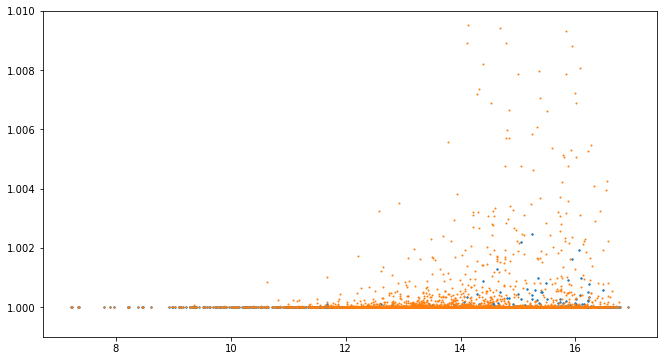

In [8]:
fig, ax = plt.subplots(1,1,figsize=[11,6], )

ax.scatter(df.iloc[:,8], (1+df.iloc[:,0]), s=2)
ax.scatter(df.iloc[:,8], (1+df.iloc[:,4]), s=1)

ax.set_ylim(0.999,1.01)

(0.98, 1.1)

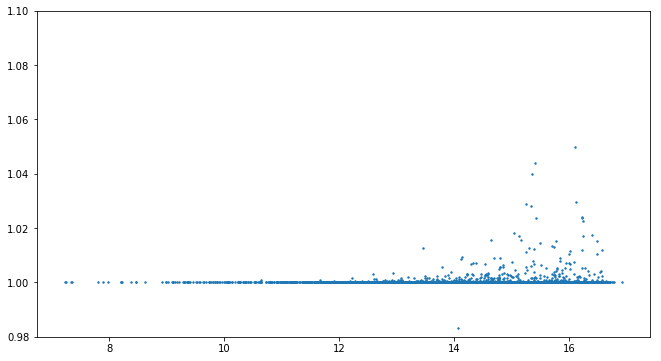

In [9]:
fig, ax = plt.subplots(1,1,figsize=[11,6], )

ax.scatter(df.iloc[:,8], (1+df.iloc[:,4])/(1+df.iloc[:,0]), s=2)


ax.set_ylim(0.98,1.1)

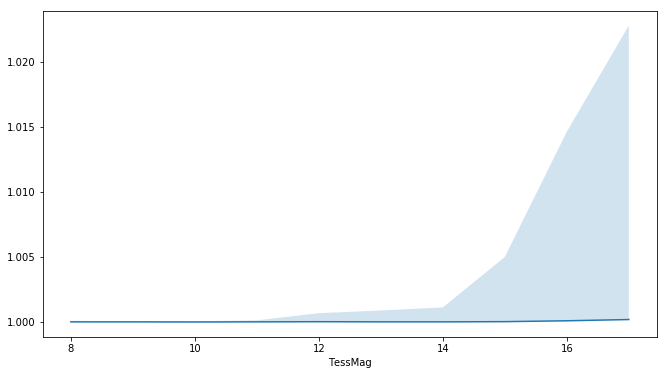

In [10]:
fig, ax = plt.subplots(1,1,figsize=[11,6], )

a = np.zeros([np.unique(idx).shape[0], 3])
for i,x in enumerate(np.unique(idx)):
    v = np.percentile((1+df.loc[idx==x,'w2.0'])/(1+df.loc[idx==x,'w1.0']), [50,90,99])
    a[i] = v
ax.plot(np.unique(idx),a.T[0])
# ax.scatter(df.iloc[:,8], (1+df.iloc[:,4])/(1+df.iloc[:,0]), s=2)
ax.fill_between(np.unique(idx),a.T[0],a.T[1], alpha=0.2)

plt.xlabel('TessMag')
# plt.ylim()

In [11]:
columns = ['RAdeg', 'DEdeg' ,'Rp', 'Per', 'S', 'K', 'Rstar', 'Teff', 
           'Vmag', 'Imag', 'Jmag', 'Ksmag', 'DM', 'Dil', 'logsigV', 
           'SNR','Mult']  
tess_catalog = pd.read_table('../../bendeksim/data/apj516470t6_mrt.txt', skiprows=32, delim_whitespace=True, 
                              names=columns)

In [12]:
l = tess_catalog.SNR.shape[0]
print(l)


1984


In [20]:
s = tess_catalog.SNR / np.random.choice((1+df.loc[idx==x,'w3.0'])/(1+df.loc[idx==x,'w1.0']), size=1984)

tess_catalog[s < 7.305]

,RAdeg,DEdeg,Rp,Per,S,K,Rstar,Teff,Vmag,Imag,Jmag,Ksmag,DM,Dil,logsigV,SNR,Mult
2,0.6458,42.940,1.7430,4.9570,235.0000,1.6600,0.9550,5546.0,10.120,9.346,8.807,8.415,4.95,1.001,-4.644,7.547,0
44,13.8200,-20.210,1.0490,15.9600,0.6248,1.1640,0.1642,3228.0,14.830,12.300,10.910,10.150,1.60,1.000,-3.959,8.256,1
150,41.9300,-45.760,2.1780,9.6810,35.2100,1.9440,0.7176,4764.0,11.950,10.880,10.110,9.487,5.20,1.058,-4.423,7.346,1
155,42.2500,-36.140,1.9790,1.6540,11500.0000,1.9010,1.3990,9162.0,8.211,8.202,8.129,8.137,6.05,1.002,-4.536,9.324,1
169,46.7600,27.050,1.3760,0.9006,128.8000,3.9460,0.4065,3570.0,14.200,12.110,10.930,10.140,3.90,1.003,-3.616,7.855,4
209,55.3000,-68.180,1.5900,25.8600,0.7633,2.0250,0.2874,3398.0,14.590,12.310,11.030,10.260,3.10,1.001,-3.836,7.892,2
217,56.1300,41.650,3.7150,8.2680,44.3900,3.5700,0.6959,4793.0,12.070,10.980,10.250,9.629,5.30,1.153,-4.517,16.310,0
225,57.6700,-57.660,1.9600,13.0400,0.8178,4.9740,0.1659,3215.0,17.580,15.020,13.610,12.830,4.30,1.153,-4.493,7.353,3
236,59.7700,10.830,1.9100,2.9900,354.8000,2.3230,0.8381,5433.0,11.030,10.240,9.663,9.231,5.45,1.001,-4.239,8.011,2
306,68.1200,-74.440,3.6780,8.6250,709.3000,2.0490,1.6550,7194.0,10.070,9.725,9.480,9.356,7.40,1.017,-3.533,7.734,1


(array([  0.,   2.,  17.,  24.,  31.,  18.,   4.,   4.,   0.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 9 Patch objects>)

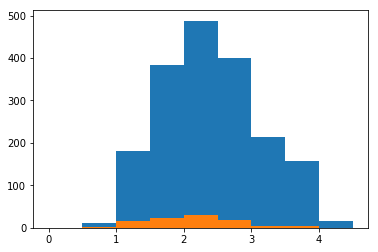

In [25]:
plt.hist(tess_catalog.Rp, bins=np.arange(0,5,0.5))
plt.hist(tess_catalog.Rp[s < 7.305],bins=np.arange(0,5,0.5))

(array([  0.,   2.,  17.,  24.,  31.,  18.,   4.,   4.,   0.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 9 Patch objects>)

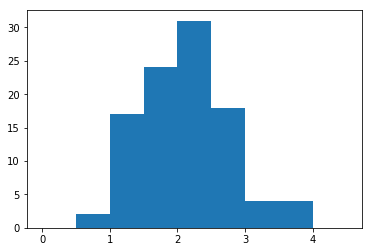

In [26]:
plt.hist(tess_catalog.Rp[s < 7.305],bins=np.arange(0,5,0.5))

In [123]:
from scipy.integrate import dblquad, 

In [125]:
dblquad(multivariate_normal, -0.5, 0.5)


TypeError: dblquad() missing 2 required positional arguments: 'gfun' and 'hfun'

In [26]:
mm = (df['w1.1'] / df['w1.0'])

In [27]:
mm[np.isfinite(mm)].median()

43.39540599950527

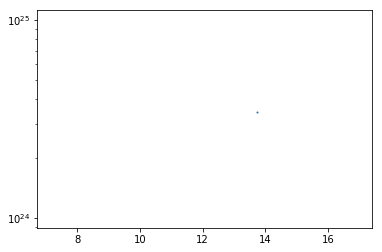

In [73]:
fig, ax = plt.subplots(1,1)
plt.scatter(df['TESSMAG'] ,(df['w2.0']- df['w1.0']) / df['w1.0'],s=1)
# plt.ylim(0,1.E-4)
ax.set_yscale("log", nonposy='clip')

In [61]:
df[df['w1.0'] > 1.E-5]

,w1.0,w1.1,w1.2,w1.3,w1.5,w2.0,w3.0,w5.0,TESSMAG,RA_DEG,DEC_DEG,TEFF,RADIUS,TICID
115,0.000065,0.000220,0.000553,0.001130,0.003087,0.010301,0.017922,0.032006,14.589,43.363396,-23.616108,2776.0,0.125000,322512367.0
157,0.062343,0.059376,0.055829,0.052066,0.044710,0.030263,0.015454,0.006655,14.067,44.335791,-40.728405,3211.0,0.300881,321068098.0
160,0.000022,0.000158,0.000718,0.002329,0.012420,0.102645,0.338775,0.351385,15.385,42.491597,-21.790758,2826.0,0.130000,219001116.0
166,0.000061,0.000153,0.000308,0.000529,0.001117,0.002680,0.004526,0.006043,13.508,47.411569,-30.243116,2999.0,0.166000,209463384.0
171,0.000018,0.000077,0.000229,0.000532,0.001743,0.007421,0.015255,0.018794,14.029,58.684047,-24.598785,3091.0,0.196000,89256199.0
227,0.000034,0.000113,0.000282,0.000572,0.001543,0.005055,0.008709,0.009518,14.633,54.308543,-22.727871,3059.0,0.184000,120959788.0
255,0.000030,0.000122,0.000354,0.000814,0.002667,0.012120,0.029024,0.028994,14.929,53.772769,-19.179028,3055.0,0.183000,120954669.0
274,0.000026,0.000106,0.000312,0.000719,0.002324,0.009830,0.023213,0.032922,15.813,42.474266,-31.040030,2934.0,0.148000,178153831.0
281,0.000018,0.000083,0.000270,0.000672,0.002449,0.012171,0.027789,0.027812,14.540,40.586117,-28.784973,3145.0,0.217000,65398579.0
289,0.000027,0.000156,0.000584,0.001624,0.006896,0.041636,0.110404,0.106124,14.538,47.378572,-39.047459,3067.0,0.187000,165166352.0


(4000, 14)